This script created on 15.02.2023 20:00 by Novruz Mammadli

EDA of NYC TLC's green taxi dataset

Because of the exam days(13th, 15th and 17th of February), only 15th and 16th of February, I could work on this task. It is not a excuse, but during the evaluation phase, please consider that this task is done in a limited time and in a short time. In report, could be some grammatic issues because of the rush.

Thank you for your time and consideration.

Best Regards,

Novruz Mammadli.

## Import Libraries

In [169]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

## Read the parquet file with Pandas library

In [329]:
df = pd.read_parquet('green_tripdata_2022-01.parquet')
df1 = df
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.50,0.50,0.5,0.00,0.0,None,0.3,4.80,2.0,1.0,0.00
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.50,0.50,0.5,0.00,0.0,None,0.3,10.80,2.0,1.0,0.00
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.50,3.25,0.5,4.60,0.0,None,0.3,23.15,1.0,1.0,2.75
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.00,0.50,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.00,0.50,0.5,5.21,0.0,None,0.3,31.26,1.0,1.0,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62490,2,2022-01-31 23:25:00,2022-01-31 23:33:00,None,NaN,40,65,NaN,1.40,8.38,0.00,0.0,1.93,0.0,None,0.3,10.61,NaN,NaN,NaN
62491,2,2022-01-31 23:52:00,2022-02-01 00:10:00,None,NaN,36,61,NaN,2.97,14.92,0.00,0.0,0.00,0.0,None,0.3,15.22,NaN,NaN,NaN
62492,2,2022-01-31 23:17:00,2022-01-31 23:36:00,None,NaN,75,167,NaN,3.70,16.26,0.00,0.0,0.00,0.0,None,0.3,16.56,NaN,NaN,NaN
62493,2,2022-01-31 23:45:00,2022-01-31 23:55:00,None,NaN,116,166,NaN,1.88,9.48,0.00,0.0,2.17,0.0,None,0.3,11.95,NaN,NaN,NaN


In [330]:
weather = pd.read_csv('3235530.csv')
weather = weather.drop(['STATION', 'TAVG', 'WT02', 'WT03', 'WT06', 'WT08', 'WT01'], axis=1)
# Convert precipitation and snow units from inches to mm
weather['PRCP'] = ((weather['PRCP'] * 25.4)).round(2)
weather['SNOW'] = ((weather['SNOW'] * 25.4)).round(2)
# Convert Temperature Unit from F to C
weather['TMAX'] = ((weather['TMAX'] - 32)  / 1.8).round(1)
weather['TMIN'] = ((weather['TMIN'] - 32)  / 1.8).round(1)

weather

,DATE,PRCP,SNOW,TMAX,TMIN
0,2022-01-01,20.07,0.00,13.3,10.0
1,2022-01-02,1.02,0.00,15.0,2.8
2,2022-01-03,0.00,0.00,2.8,-5.6
3,2022-01-04,0.00,0.00,1.1,-7.2
4,2022-01-05,5.84,0.00,8.3,-0.6
5,2022-01-06,0.00,0.00,5.0,1.1
6,2022-01-07,9.65,147.32,1.1,-3.9
7,2022-01-08,0.00,0.00,-1.1,-6.7
8,2022-01-09,2.54,0.00,4.4,-1.7
9,2022-01-10,0.00,0.00,4.4,-4.4


## Information about columns
##### Based on NYC TLC informations 

### VendorID
These values indicate which vendor provided the equipment that was used to record the trip data for a given taxi trip.
- 1: Creative Mobile Technologies
- 2: VeriFone Inc.


### lpep_pickup_datetime
This column indicates the date and time when a taxi trip started. The column contains date and time values.
- "YYYY-MM-DD HH:MM:SS" (year-month-day hour:minute:second)


### lpep_dropoff_datetime
This column indicates the date and time when a taxi trip ended. 
- "YYYY-MM-DD HH:MM:SS" (year-month-day hour:minute:second)


### store_and_fwd_flag
This column indicates whether the trip data was stored in the vehicle's on-board computer (i.e., the taximeter) before being forwarded to the vendor or whether it was immediately sent to the vendor.
- "Y": The trip data was stored in the vehicle's on-board computer before being forwarded to the vendor.
- "N": The trip data was not stored in the vehicle's on-board computer and was immediately sent to the vendor.


### RatecodeID
A rate code is a fixed fare for a particular type of trip.


### PULocationID
In the context of the NYC TLC dataset, each taxi trip is assigned a pickup location ID that corresponds to a specific __location__ or __zone__ within New York City.


### DOLocationID
This column indicates the __taxi zone__ where the passenger was dropped off at the end of the trip.


### passenger_count
This column indicates the number of passengers in the taxi during the trip. The column contains values ranging from __0__ to __9__.


### trip_distance
This column indicates the distance (in miles) traveled by the taxi during the trip. 


### fare_amount
This column indicates the metered fare charged for the trip.


### extra
This column indicates any additional charges or fees applied to the metered fare. 


### mta_tax
The *mta_tax* column indicates the amount of the tax that is imposed by the Metropolitan Transportation Authority (MTA) on taxi trips in New York City. 


### tip_amount
This column indicates the amount of the tip that was given by the passenger for the trip. 


### tolls_amount
The *tolls_amount* column indicates the amount of any tolls or bridge fees that were paid by the passenger during the trip.


### ehail_fee
The *ehail_fee* column is used to record any additional money that the passenger paid for the convenience of using an e-hail service, which allows passengers to hail and pay for a taxi ride using a smartphone app. 


### improvement_surcharge
The surcharge fee is added to the metered fare for each trip, and is included in the total fare at the end of the trip.


### total_amount
The *total_amount* column includes all components of the taxi fare, such as the base fare, distance traveled, any applicable surcharges, taxes, tolls, tips, and any other fees or charges associated with the trip. It is the final amount that the passenger is expected to pay at the end of the ride.


### payment_type
These values indicate the payment method that was used for each trip. The *payment_type* column can be useful for analyzing payment trends for taxi trips.
- 1: Credit card
- 2: Cash
- 3: No charge
- 4: Dispute
- 5: Unknown
- 6: Voided trip

### trip_type
The *trip_type* column can be useful for analyzing the usage patterns of different types of taxi trips.
- 1: Street hail
- 2: Dispatch

### congestion_surcharge
The fee is added to the total cost of a taxi or for-hire vehicle (FHV) ride that begins, ends or passes through the congestion pricing zone. The congestion surcharge is a fixed fee of \\$2.50 (Yellow Taxi) or \\$2.75 (Green Taxi and FHV) or 75 cents (any shared ride).

## Information about data's metadata.

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62495 entries, 0 to 62494
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               62495 non-null  int64         
 1   lpep_pickup_datetime   62495 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  62495 non-null  datetime64[ns]
 3   store_and_fwd_flag     56200 non-null  object        
 4   RatecodeID             56200 non-null  float64       
 5   PULocationID           62495 non-null  int64         
 6   DOLocationID           62495 non-null  int64         
 7   passenger_count        56200 non-null  float64       
 8   trip_distance          62495 non-null  float64       
 9   fare_amount            62495 non-null  float64       
 10  extra                  62495 non-null  float64       
 11  mta_tax                62495 non-null  float64       
 12  tip_amount             62495 non-null  float64       
 13  t

## To see Central Tendency and Deviation

In [332]:
df.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,62495.000000,56200.000000,62495.000000,62495.000000,56200.000000,62495.000000,62495.000000,62495.00000,62495.000000,62495.000000,62495.000000,62495.000000,62495.000000,56200.000000,56200.000000,56200.000000
mean,1.849508,1.198719,97.615041,135.969902,1.258399,77.758632,13.914000,0.34756,0.426322,1.666540,0.208182,0.297312,17.490532,1.403594,1.040925,0.706628
std,0.357556,0.862313,62.987311,77.590956,0.877743,2909.354163,12.088819,0.65781,0.181381,2.484928,1.257659,0.037201,13.623416,0.516316,0.198119,1.201632
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-65.000000,-4.50000,-0.500000,-0.860000,-6.550000,-0.300000,-71.850000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,55.000000,74.000000,1.000000,1.080000,7.000000,0.00000,0.500000,0.000000,0.000000,0.300000,9.360000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,137.000000,1.000000,1.900000,10.500000,0.00000,0.500000,1.000000,0.000000,0.300000,13.860000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,130.000000,215.000000,1.000000,3.500000,17.000000,0.50000,0.500000,2.610000,0.000000,0.300000,21.050000,2.000000,1.000000,2.750000
max,2.000000,5.000000,265.000000,265.000000,8.000000,224481.380000,604.500000,4.50000,0.500000,76.770000,44.750000,0.300000,605.300000,5.000000,2.000000,2.750000


### To see _Taxi Zones_

In [333]:
df2 = pd.read_csv('taxi+_zone_lookup.csv')
df2

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


## Check for N/A values, outliers etc.

In [334]:
df.isnull().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        6295
RatecodeID                6295
PULocationID                 0
DOLocationID                 0
passenger_count           6295
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                62495
improvement_surcharge        0
total_amount                 0
payment_type              6295
trip_type                 6295
congestion_surcharge      6295
dtype: int64

In [335]:
df.nunique()

VendorID                     2
lpep_pickup_datetime     60635
lpep_dropoff_datetime    60610
store_and_fwd_flag           2
RatecodeID                   5
PULocationID               231
DOLocationID               240
passenger_count              9
trip_distance             1961
fare_amount               2678
extra                       10
mta_tax                      3
tip_amount                1301
tolls_amount                29
ehail_fee                    0
improvement_surcharge        3
total_amount              4026
payment_type                 5
trip_type                    2
congestion_surcharge         3
dtype: int64

1. Pickup hour - from pickup_datetime
2. Pickup week day name
3. Pickup date
4. Pickup month
5. Pickup day of week in numbers

In [336]:
df1.loc[:, 'pickup_hour'] = df1['lpep_pickup_datetime'].dt.hour
df1.loc[:, 'pickup_weekday'] = df1['lpep_pickup_datetime'].dt.day_name()
df1.loc[:, 'pickup_date'] = df1['lpep_pickup_datetime'].dt.day
df1.loc[:, 'pickup_month'] = df1['lpep_pickup_datetime'].dt.month
df1.loc[:, 'pickup_day'] = df1['lpep_pickup_datetime'].dt.dayofweek
df1

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_hour,pickup_weekday,pickup_date,pickup_month,pickup_day
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.50,...,0.3,4.80,2.0,1.0,0.00,0,Saturday,1,1,5
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.50,...,0.3,10.80,2.0,1.0,0.00,0,Saturday,1,1,5
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.50,...,0.3,23.15,1.0,1.0,2.75,0,Saturday,1,1,5
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.00,...,0.3,9.30,2.0,1.0,0.00,0,Saturday,1,1,5
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.00,...,0.3,31.26,1.0,1.0,2.75,0,Saturday,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62490,2,2022-01-31 23:25:00,2022-01-31 23:33:00,None,NaN,40,65,NaN,1.40,8.38,...,0.3,10.61,NaN,NaN,NaN,23,Monday,31,1,0
62491,2,2022-01-31 23:52:00,2022-02-01 00:10:00,None,NaN,36,61,NaN,2.97,14.92,...,0.3,15.22,NaN,NaN,NaN,23,Monday,31,1,0
62492,2,2022-01-31 23:17:00,2022-01-31 23:36:00,None,NaN,75,167,NaN,3.70,16.26,...,0.3,16.56,NaN,NaN,NaN,23,Monday,31,1,0
62493,2,2022-01-31 23:45:00,2022-01-31 23:55:00,None,NaN,116,166,NaN,1.88,9.48,...,0.3,11.95,NaN,NaN,NaN,23,Monday,31,1,0


$2.50 initial charge.

### Converting Mile to Km, calculating duration of trip and average speed

In [337]:
# Calculating trip duration
df1.loc[:, 'trip_duration'] = (df1['lpep_dropoff_datetime'] - df1['lpep_pickup_datetime']).dt.total_seconds()
# Converting Mile to Km
df1['trip_distance'] = df1['trip_distance'] * 1.609344
# Calculating Average Speed in km/h
df1.loc[:, 'average_speed'] = df1['trip_distance'] / (df1['trip_duration'] / 3600) # Second to Hour
df1['fare_per_km'] = df1['fare_amount'] / (df1['trip_distance'])

In [338]:
df1

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,trip_type,congestion_surcharge,pickup_hour,pickup_weekday,pickup_date,pickup_month,pickup_day,trip_duration,average_speed,fare_per_km
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.708111,3.50,...,1.0,0.00,0,Saturday,1,1,5,72.0,35.405568,4.942725
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,3.379622,9.50,...,1.0,0.00,0,Saturday,1,1,5,523.0,23.263175,2.810965
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,5.954573,14.50,...,1.0,2.75,0,Saturday,1,1,5,972.0,22.053973,2.435103
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,2.719791,8.00,...,1.0,0.00,0,Saturday,1,1,5,495.0,19.780301,2.941402
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,10.074493,22.00,...,1.0,2.75,0,Saturday,1,1,5,1262.0,28.738650,2.183733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62490,2,2022-01-31 23:25:00,2022-01-31 23:33:00,None,NaN,40,65,NaN,2.253082,8.38,...,NaN,NaN,23,Monday,31,1,0,480.0,16.898112,3.719350
62491,2,2022-01-31 23:52:00,2022-02-01 00:10:00,None,NaN,36,61,NaN,4.779752,14.92,...,NaN,NaN,23,Monday,31,1,0,1080.0,15.932506,3.121501
62492,2,2022-01-31 23:17:00,2022-01-31 23:36:00,None,NaN,75,167,NaN,5.954573,16.26,...,NaN,NaN,23,Monday,31,1,0,1140.0,18.803914,2.730674
62493,2,2022-01-31 23:45:00,2022-01-31 23:55:00,None,NaN,116,166,NaN,3.025567,9.48,...,NaN,NaN,23,Monday,31,1,0,600.0,18.153400,3.133297


In [339]:
df1.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,...,payment_type,trip_type,congestion_surcharge,pickup_hour,pickup_date,pickup_month,pickup_day,trip_duration,average_speed,fare_per_km
count,62495.000000,56200.000000,62495.000000,62495.000000,56200.000000,62495.000000,62495.000000,62495.00000,62495.000000,62495.000000,...,56200.000000,56200.000000,56200.000000,62495.000000,62495.000000,62495.000000,62495.000000,62495.000000,6.241900e+04,6.243000e+04
mean,1.849508,1.198719,97.615041,135.969902,1.258399,125.140388,13.914000,0.34756,0.426322,1.666540,...,1.403594,1.040925,0.706628,13.700072,16.082071,1.000528,2.814705,1141.163197,inf,NaN
std,0.357556,0.862313,62.987311,77.590956,0.877743,4682.151666,12.088819,0.65781,0.181381,2.484928,...,0.516316,0.198119,1.201632,5.044285,8.685490,0.076212,1.981441,4692.943897,NaN,NaN
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-65.000000,-4.50000,-0.500000,-0.860000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,-inf
25%,2.000000,1.000000,55.000000,74.000000,1.000000,1.738092,7.000000,0.00000,0.500000,0.000000,...,1.000000,1.000000,0.000000,10.000000,8.000000,1.000000,1.000000,420.000000,1.330843e+01,2.592033e+00
50%,2.000000,1.000000,75.000000,137.000000,1.000000,3.057754,10.500000,0.00000,0.500000,1.000000,...,1.000000,1.000000,0.000000,14.000000,16.000000,1.000000,3.000000,695.000000,1.712405e+01,3.164390e+00
75%,2.000000,1.000000,130.000000,215.000000,1.000000,5.632704,17.000000,0.50000,0.500000,2.610000,...,2.000000,1.000000,2.750000,17.000000,24.000000,1.000000,4.000000,1092.000000,2.267076e+01,3.996234e+00
max,2.000000,5.000000,265.000000,265.000000,8.000000,361267.762015,604.500000,4.50000,0.500000,76.770000,...,5.000000,2.000000,2.750000,23.000000,31.000000,12.000000,6.000000,86368.000000,inf,inf


In [340]:
# There are some trips those durations and distances are 0. They will be eliminated.
df1 = df1.drop(df1[(df1.trip_duration < 60) | (df1.trip_duration > (3600 * 2.5))].index)
df1 = df1.drop(df1[(df1.trip_distance == 0) | (df1.trip_distance > 100)].index)
# 3 trips are from 2021 December trips
df1 = df1.drop(df1[(df1.pickup_month == 12)].index)
# Reset indices
df1 = df1.reset_index(drop = True)
df1['pickup_date'] = pd.to_datetime(df1['lpep_pickup_datetime'].dt.date)
df1

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,trip_type,congestion_surcharge,pickup_hour,pickup_weekday,pickup_date,pickup_month,pickup_day,trip_duration,average_speed,fare_per_km
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.708111,3.50,...,1.0,0.00,0,Saturday,2022-01-01,1,5,72.0,35.405568,4.942725
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,3.379622,9.50,...,1.0,0.00,0,Saturday,2022-01-01,1,5,523.0,23.263175,2.810965
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,5.954573,14.50,...,1.0,2.75,0,Saturday,2022-01-01,1,5,972.0,22.053973,2.435103
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,2.719791,8.00,...,1.0,0.00,0,Saturday,2022-01-01,1,5,495.0,19.780301,2.941402
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,10.074493,22.00,...,1.0,2.75,0,Saturday,2022-01-01,1,5,1262.0,28.738650,2.183733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57803,2,2022-01-31 23:25:00,2022-01-31 23:33:00,None,NaN,40,65,NaN,2.253082,8.38,...,NaN,NaN,23,Monday,2022-01-31,1,0,480.0,16.898112,3.719350
57804,2,2022-01-31 23:52:00,2022-02-01 00:10:00,None,NaN,36,61,NaN,4.779752,14.92,...,NaN,NaN,23,Monday,2022-01-31,1,0,1080.0,15.932506,3.121501
57805,2,2022-01-31 23:17:00,2022-01-31 23:36:00,None,NaN,75,167,NaN,5.954573,16.26,...,NaN,NaN,23,Monday,2022-01-31,1,0,1140.0,18.803914,2.730674
57806,2,2022-01-31 23:45:00,2022-01-31 23:55:00,None,NaN,116,166,NaN,3.025567,9.48,...,NaN,NaN,23,Monday,2022-01-31,1,0,600.0,18.153400,3.133297


In [341]:
df1.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,pickup_hour,pickup_month,pickup_day,trip_duration,average_speed,fare_per_km
count,57808.000000,51766.000000,57808.000000,57808.000000,51766.000000,57808.000000,57808.000000,57808.000000,57808.000000,57808.000000,...,57808.000000,51766.000000,51766.000000,51766.000000,57808.000000,57808.0,57808.000000,57808.000000,57808.000000,57808.000000
mean,1.873564,1.129718,95.926290,136.062258,1.270544,4.859657,13.301997,0.368937,0.434187,1.720881,...,16.964911,1.405536,1.024186,0.760726,13.758719,1.0,2.816842,850.788161,20.023348,3.703125
std,0.332343,0.702604,61.681375,77.357282,0.894903,4.804407,10.064102,0.672782,0.170926,2.331468,...,11.847744,0.505845,0.153627,1.230167,5.027725,0.0,1.981730,633.376144,10.117546,18.360143
min,1.000000,1.000000,3.000000,1.000000,0.000000,0.016093,-65.000000,-1.000000,-0.500000,0.000000,...,-71.850000,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,60.000000,0.018242,-1864.113577
25%,2.000000,1.000000,52.000000,74.000000,1.000000,1.979493,7.000000,0.000000,0.500000,0.000000,...,9.360000,1.000000,1.000000,0.000000,10.000000,1.0,1.000000,441.000000,14.047432,2.558587
50%,2.000000,1.000000,75.000000,138.000000,1.000000,3.250875,10.500000,0.000000,0.500000,1.160000,...,13.800000,1.000000,1.000000,0.000000,14.000000,1.0,3.000000,700.000000,17.573311,3.106856
75%,2.000000,1.000000,129.000000,216.000000,1.000000,5.922386,16.000000,0.500000,0.500000,2.700000,...,20.460000,2.000000,1.000000,2.750000,18.000000,1.0,4.000000,1077.000000,23.077386,3.778609
max,2.000000,5.000000,265.000000,265.000000,8.000000,94.983483,252.000000,4.500000,0.500000,60.800000,...,262.050000,5.000000,2.000000,2.750000,23.000000,1.0,6.000000,8844.000000,540.739584,1864.113577


# Visualization

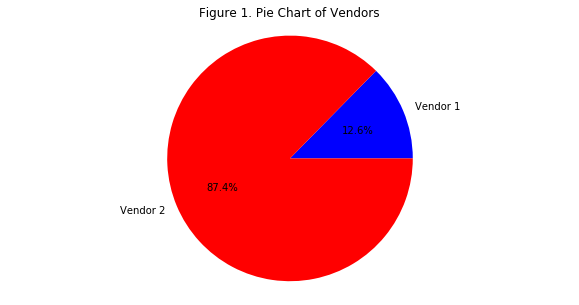

In [342]:
plt.figure(figsize=(10,5))

vendor_counts = df1.groupby('VendorID').size()

# Create a pie chart of Vendor 1 vs Vendor 2 trips
labels = ['Vendor 1', 'Vendor 2']
colors = ['b', 'r']
plt.pie(vendor_counts, labels = labels, colors = colors, autopct = '%1.1f%%')
plt.axis('equal')
plt.title('Figure 1. Pie Chart of Vendors')
plt.show()

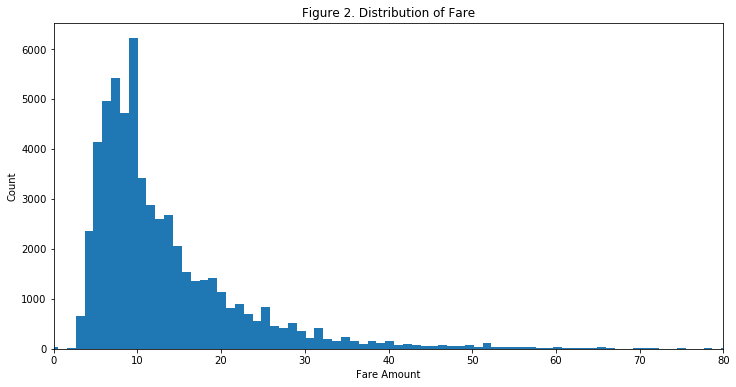

In [343]:
plt.figure(figsize=(12, 6))
plt.hist(df1['fare_amount'], bins=300)
plt.xlabel('Fare Amount')
plt.ylabel('Count')
plt.title('Figure 2. Distribution of Fare')
plt.xlim(0,80)
plt.show()

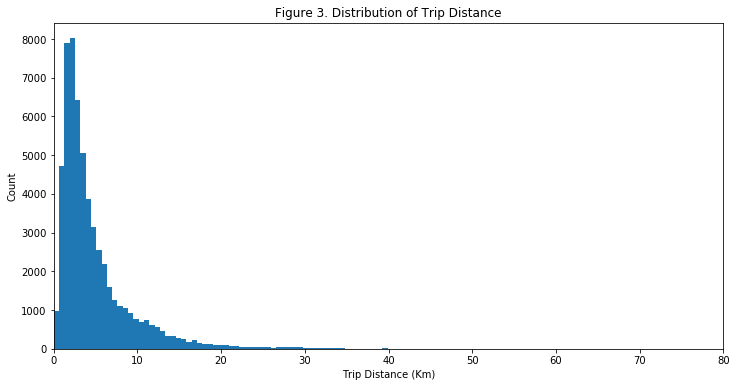

In [344]:
plt.figure(figsize=(12, 6))
plt.hist(df1['trip_distance'], bins=150)
plt.xlabel('Trip Distance (Km)')
plt.ylabel('Count')
plt.xlim(0,80)
plt.title('Figure 3. Distribution of Trip Distance')
plt.show()

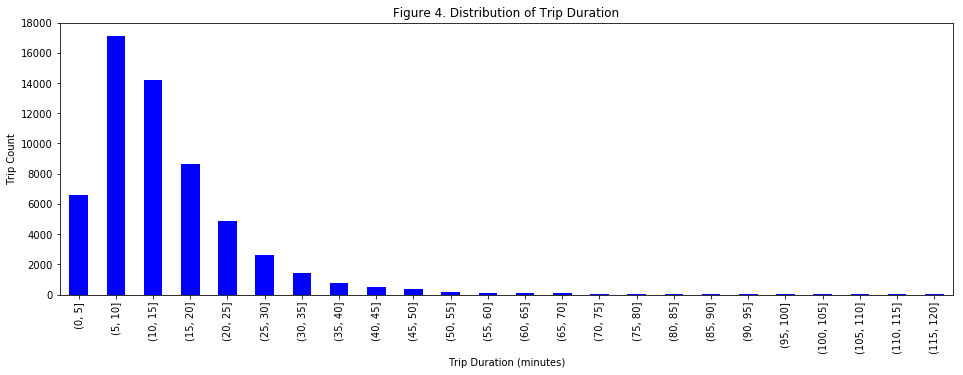

In [345]:
plt.figure(figsize=(16,5))

duration_counts = df1.groupby(pd.cut(df1['trip_duration'] / 60, bins = range(0, 121, 5))).size()

# create a bar plot of trip duration versus trip count
ax = duration_counts.plot(kind='bar', color='b')
ax.set_xlabel('Trip Duration (minutes)')
ax.set_ylabel('Trip Count')
plt.title('Figure 4. Distribution of Trip Duration')
plt.show()

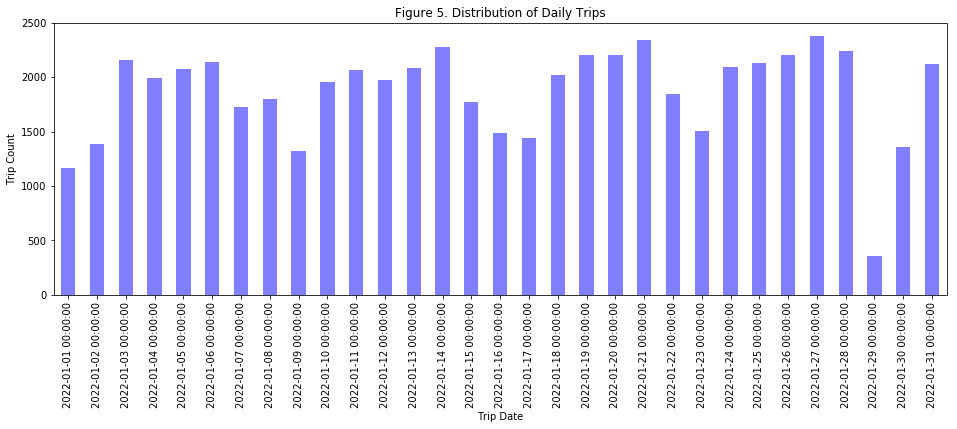

In [347]:
plt.figure(figsize=(16,5))

pickup_date = pd.to_datetime(df1['pickup_date']).dt.date

# group the data by pickup date and count the number of trips on each date
date_counts = df1.groupby('pickup_date').size()

# create a bar plot of pickup dates versus trip count
ax = date_counts.plot(kind='bar', color='b', alpha=0.5)
ax.set_xlabel('Trip Date')
ax.set_ylabel('Trip Count')
plt.title('Figure 5. Distribution of Daily Trips')
plt.show()

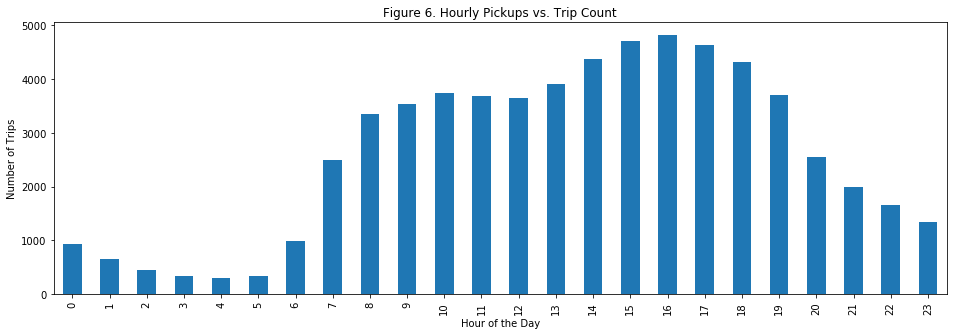

In [348]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])

# Group the data by hour and count the number of trips in each hour
hourly_trips = df.groupby(df['lpep_pickup_datetime'].dt.hour)['VendorID'].count()

# Plot the results as a bar chart
fig, ax = plt.subplots(figsize=(16, 5))
hourly_trips.plot(kind='bar', ax=ax)
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Number of Trips')
ax.set_title('Figure 6. Hourly Pickups vs. Trip Count')
plt.show()

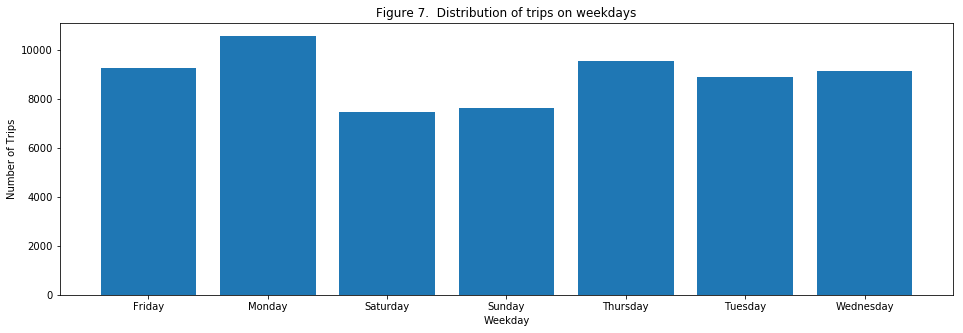

In [349]:
# group by pickup weekday and count the trips
trips_by_weekday = df.groupby('pickup_weekday')['VendorID'].count()

# plot the data
plt.figure(figsize=(16, 5))
plt.bar(trips_by_weekday.index, trips_by_weekday.values)
plt.xlabel('Weekday')
plt.ylabel('Number of Trips')
plt.title('Figure 7.  Distribution of trips on weekdays')
plt.show()

/home/Novruz/jupyter_dir/jupyter_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/Novruz/jupyter_dir/jupyter_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5,1,'Figure 10. Weekly Variation of Total number of pickups')

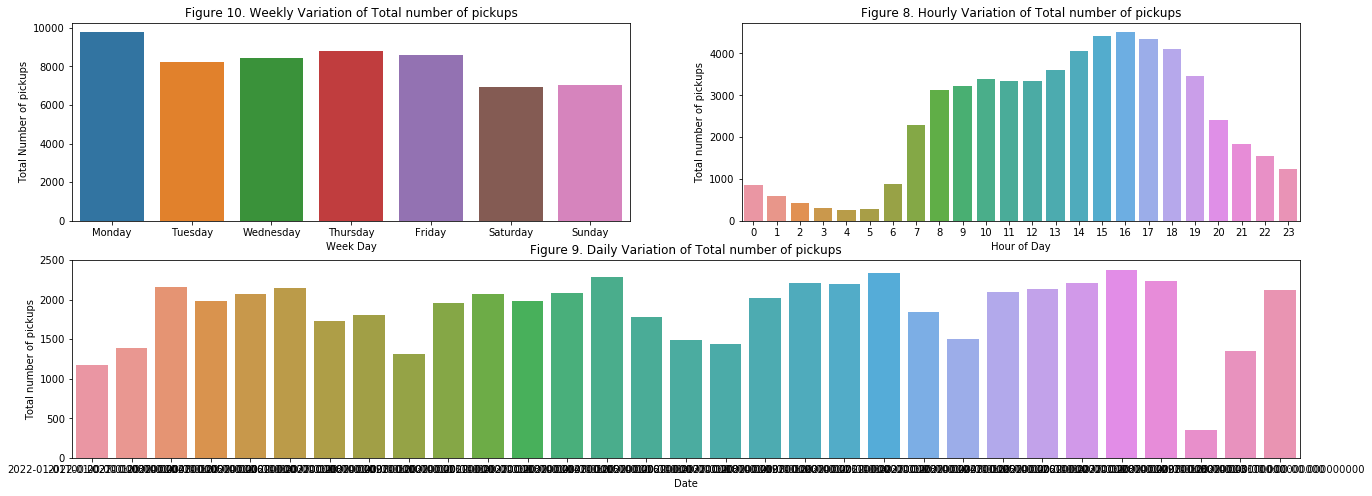

In [355]:
plt.figure(figsize=(22, 8))


# Hour of day
plt.subplot(222)
sns.countplot(df1['pickup_hour'])
plt.xlabel('Hour of Day')
plt.ylabel('Total number of pickups')
plt.title('Figure 8. Hourly Variation of Total number of pickups')

# Date
plt.subplot(212)
sns.countplot(df1['pickup_date'])
plt.xlabel('Date')
plt.ylabel('Total number of pickups')
plt.title('Figure 9. Daily Variation of Total number of pickups')

# Day of week
plt.subplot(221)
sns.countplot(df1['pickup_weekday'], order = ['Monday', 'Tuesday', 'Wednesday', 
                                           'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Week Day')
plt.ylabel('Total Number of pickups')
plt.title('Figure 10. Weekly Variation of Total number of pickups')

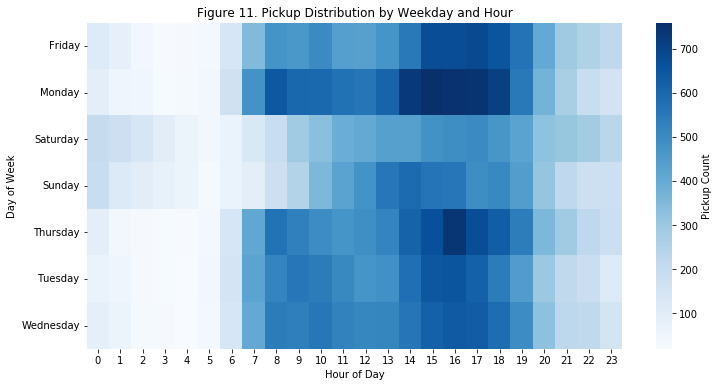

In [356]:
grouped = df1.groupby(['pickup_weekday', 'pickup_hour']).size().unstack()

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(grouped, cmap='Blues', cbar_kws={'label': 'Pickup Count'})
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.title('Figure 11. Pickup Distribution by Weekday and Hour')
plt.show()

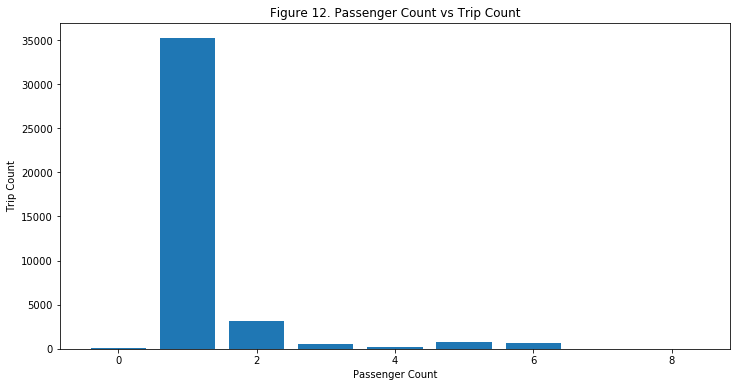

In [306]:
# Group the dataframe by passenger count and count the number of trips
grouped = df1.groupby('passenger_count')['VendorID'].count()

# Plot the data as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(grouped.index, grouped.values)
plt.xlabel('Passenger Count')
plt.ylabel('Trip Count')
plt.title('Figure 12. Passenger Count vs Trip Count')
plt.show()

Text(0.5,1,'Figure 14. Daily Revenue Distribution')

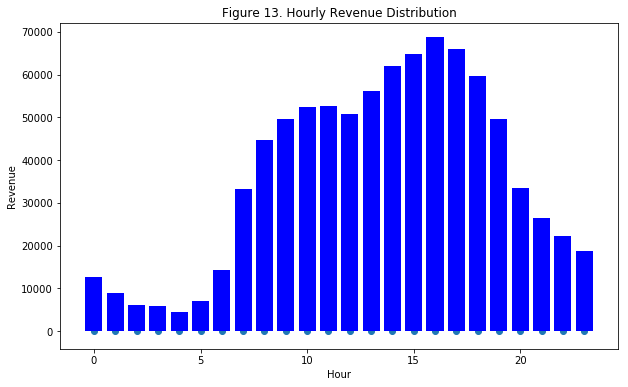

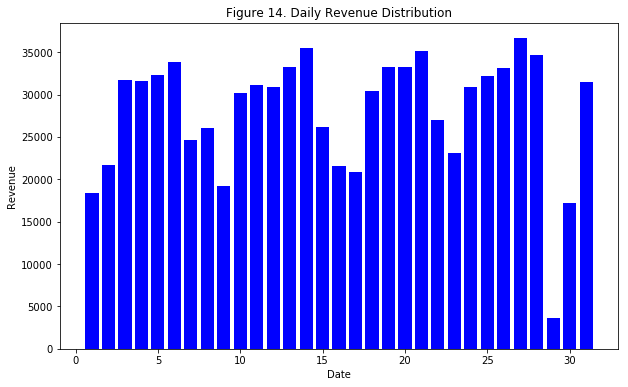

In [323]:
df1 = df1.set_index('pickup_date')

# Calculate revenue
df['revenue'] = df['total_amount'] - df['improvement_surcharge'] - df['congestion_surcharge']

# Hourly revenue
hourly_revenue = df.groupby(df['lpep_pickup_datetime'].dt.hour)['revenue'].sum()
hourly_mean_revenue = df.groupby(df['lpep_pickup_datetime'].dt.hour)['revenue'].mean()

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(hourly_revenue.index, hourly_revenue.values, color='blue')
ax.scatter(hourly_revenue.index, hourly_mean_revenue)
ax.set_xlabel('Hour')
ax.set_ylabel('Revenue')
ax.set_title('Figure 13. Hourly Revenue Distribution')

# Daily revenue
daily_revenue = df.groupby(df['lpep_pickup_datetime'].dt.day)['revenue'].sum()

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(daily_revenue.index, daily_revenue.values, color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Revenue')
ax.set_title('Figure 14. Daily Revenue Distribution')

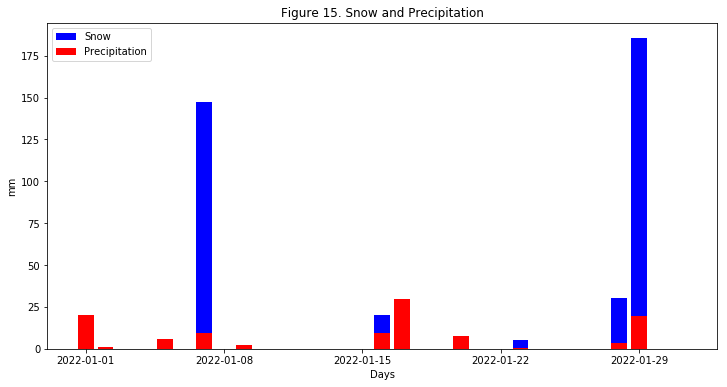

In [357]:
# Convert Date column to datetime data type
weather['DATE'] = pd.to_datetime(weather['DATE'])
# Calculate total trips per day

plt.figure(figsize=(12,6))
plt.bar(weather['DATE'], weather['SNOW'], color='blue', label='Snow')
plt.bar(weather['DATE'], weather['PRCP'], color='red', label='Precipitation')
plt.legend()
plt.xlabel('Days')
plt.ylabel('mm')
plt.title('Figure 15. Snow and Precipitation')
plt.show()

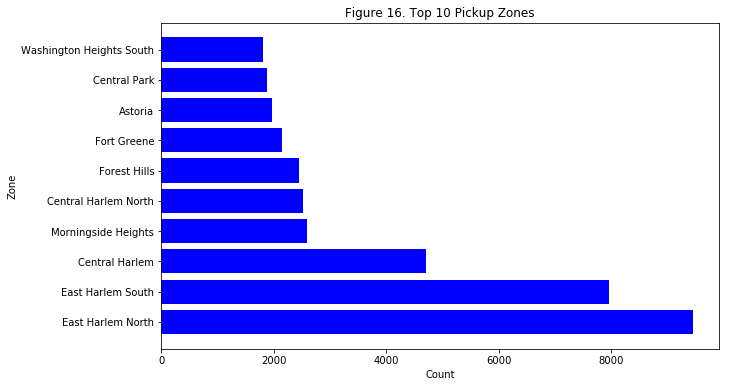

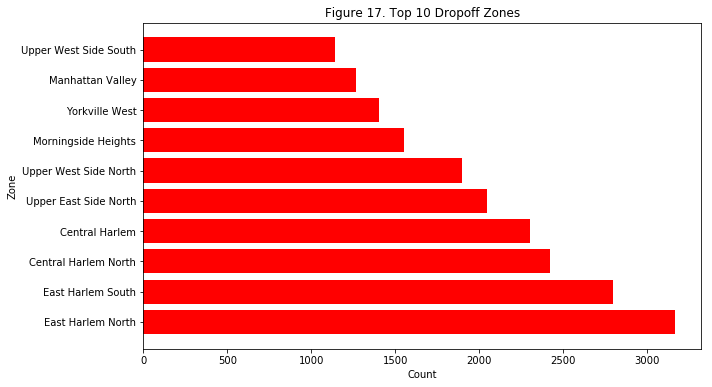

In [358]:
pickup_merged = pd.merge(df1, df2, left_on='PULocationID', right_on='LocationID')
dropoff_merged = pd.merge(df1, df2, left_on='DOLocationID', right_on='LocationID')

# Count pickups and dropoffs by zone
pickup_counts = pickup_merged.groupby('Zone')['PULocationID'].count().sort_values(ascending=False).head(10)
dropoff_counts = dropoff_merged.groupby('Zone')['DOLocationID'].count().sort_values(ascending=False).head(10)

# Create separate plots for pickups and dropoffs
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.barh(pickup_counts.index, pickup_counts.values, color='blue')
ax1.set_title('Figure 16. Top 10 Pickup Zones')
ax1.set_xlabel('Count')
ax1.set_ylabel('Zone')

fig, ax2 = plt.subplots(figsize=(10, 6))
ax2.barh(dropoff_counts.index, dropoff_counts.values, color='red')
ax2.set_title('Figure 17. Top 10 Dropoff Zones')
ax2.set_xlabel('Count')
ax2.set_ylabel('Zone')

plt.show()

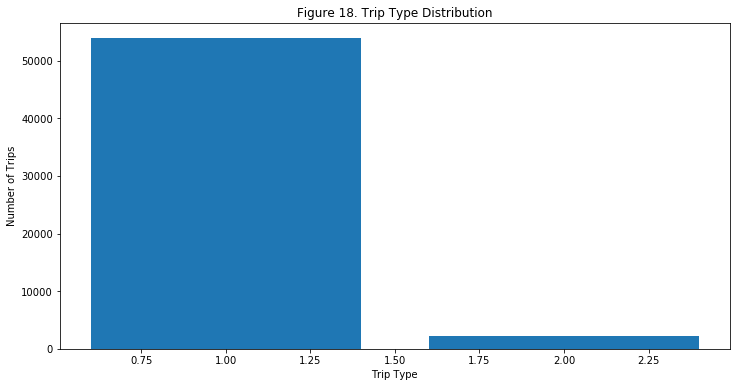

In [371]:
# Count the number of occurrences of each trip_type
trip_type_counts = df['trip_type'].value_counts()

# Create a bar chart of the trip_type distribution
plt.figure(figsize=(12, 6))
plt.bar(trip_type_counts.index, trip_type_counts.values)
plt.xlabel('Trip Type')
plt.ylabel('Number of Trips')
plt.title('Figure 18. Trip Type Distribution')
plt.show()

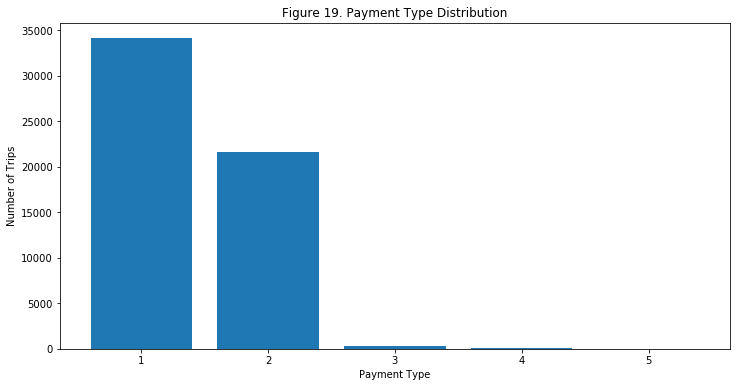

In [375]:
# Count the number of occurrences of each payment_type
payment_type_counts = df['payment_type'].value_counts()

# Create a bar chart of the payment_type distribution
plt.figure(figsize=(12, 6))
plt.bar(payment_type_counts.index, payment_type_counts.values)
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.title('Figure 19. Payment Type Distribution')
plt.show()

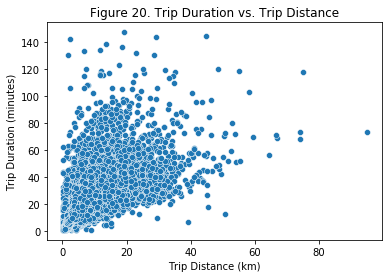

In [372]:
# Select columns for duration and distance
duration = df1['trip_duration'] / 60
distance = df1['trip_distance']
avg_spd = df1['average_speed']

# Create scatter plot
sns.scatterplot(x=distance, y=duration)

# Set plot title and axis labels
plt.title('Figure 20. Trip Duration vs. Trip Distance')
plt.xlabel('Trip Distance (km)')
plt.ylabel('Trip Duration (minutes)')

# Show plot
plt.show()

/home/Novruz/jupyter_dir/jupyter_env/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/Novruz/jupyter_dir/jupyter_env/lib/python3.8/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


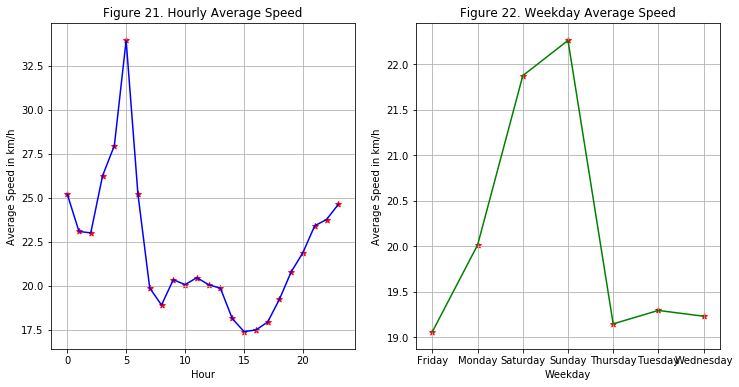

In [373]:
# Group average speed by hour and weekday
hourly_speed = df1.groupby('pickup_hour')['average_speed'].mean()
weekday_speed = df1.groupby('pickup_weekday')['average_speed'].mean()

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Hourly average speed subplot
ax1.plot(hourly_speed.index, hourly_speed.values, color='blue')
ax1.scatter(hourly_speed.index, hourly_speed.values, color='red', marker = '*')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Average Speed in km/h')
ax1.set_title('Figure 21. Hourly Average Speed')
ax1.grid()

# Weekday average speed subplot
ax2.plot(weekday_speed.index, weekday_speed.values, color='green')
ax2.scatter(weekday_speed.index, weekday_speed.values, color='red', marker = '*')
ax2.set_xlabel('Weekday')
ax2.set_ylabel('Average Speed in km/h')
ax2.set_title('Figure 22. Weekday Average Speed')
ax2.grid()
# Show plot
plt.show()

# Correlation

Text(0.5,1,'Figure 23. Correlations')

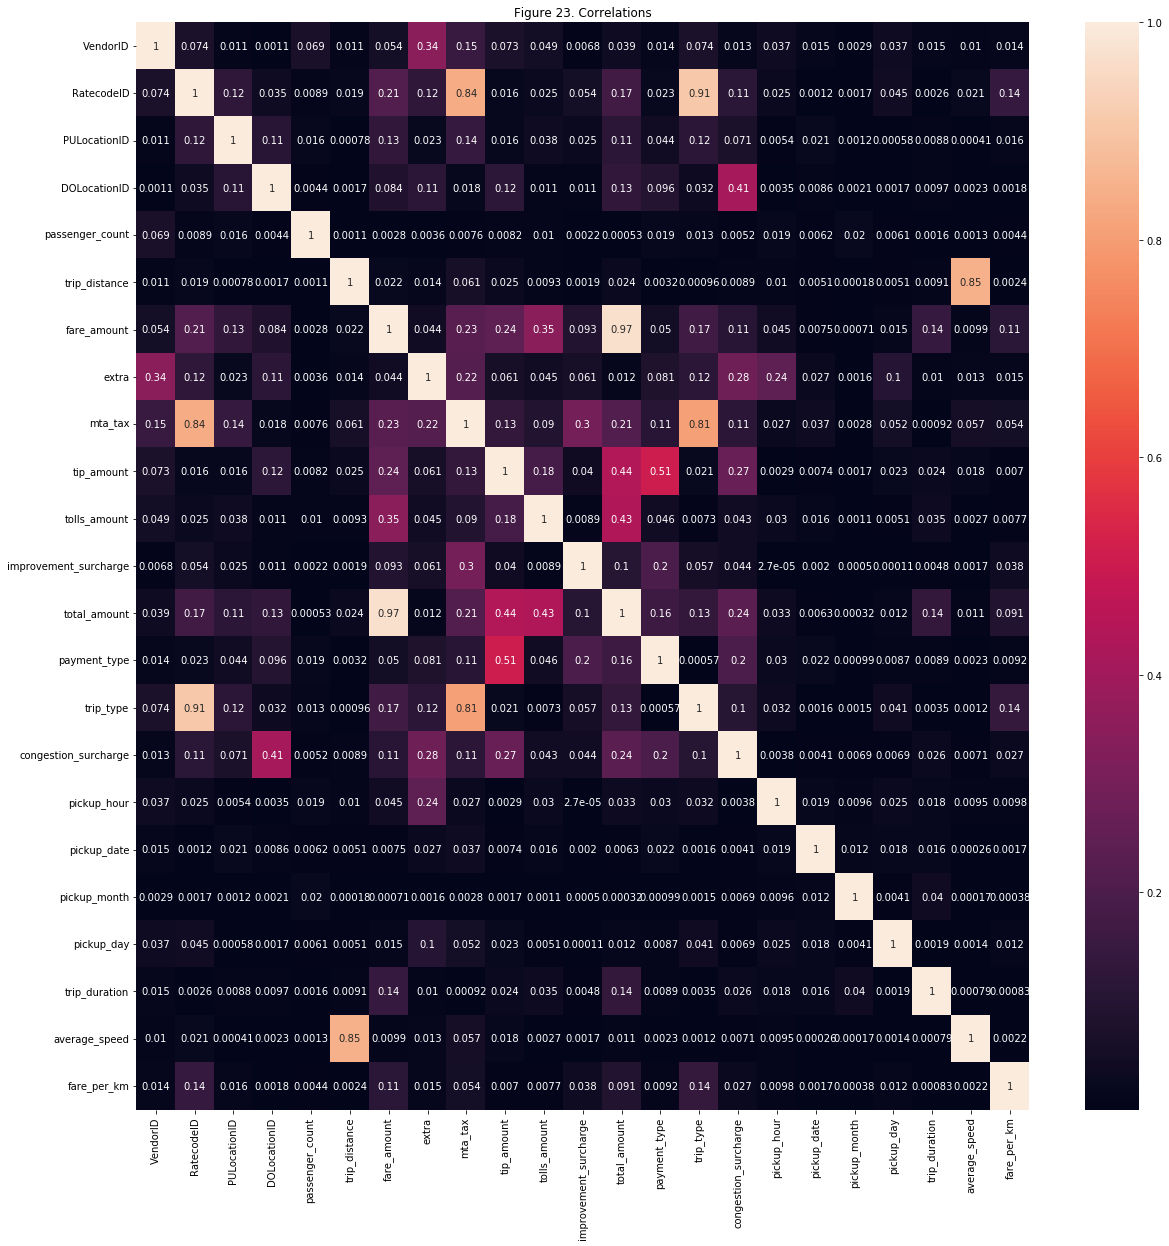

In [374]:
plt.figure(figsize=(20,20))
sns.heatmap(abs(df.corr()), annot=True)
plt.title('Figure 23. Correlations')